In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [40]:
x = symbols('x')

In [41]:
f = 1 / (1 + 25 * x ** 2)

In [42]:
x_0 = -1
x_m = 3
m = 20

In [57]:
X = [0] * (m + 1)
Y = [0] * (m + 1)
for k in range(1, m + 1):
    X[k] = N((x_0 + x_m) / 2 + (x_m - x_0) / 2 * cos(pi * (2 * k - 1) / (2 * m)))
    Y[k] = N(f.subs(x, X[k]))

In [58]:
Q = 0

t = symbols('t')
for k in range(1, m + 1):
    l = 1
    for i in range(1, m + 1):
        if i != k:
            l = l * ((t - X[i]) / (X[k] - X[i]))
    Q = Q + l * Y[k]

In [59]:
expand(Q)

-0.0165200805485098*t**19 + 0.332705042262989*t**18 - 2.85382151588059*t**17 + 13.2639379459219*t**16 - 33.97928102008*t**15 + 35.4268840239363*t**14 + 43.8904668170929*t**13 - 170.516412829826*t**12 + 127.216863578061*t**11 + 159.511692905959*t**10 - 297.755820953851*t**9 + 18.284406391037*t**8 + 235.984593026732*t**7 - 99.7867761600329*t**6 - 85.5232640360425*t**5 + 53.8533500824481*t**4 + 13.7437284315305*t**3 - 11.2693104053615*t**2 - 0.738713632683805*t + 0.942414217680173

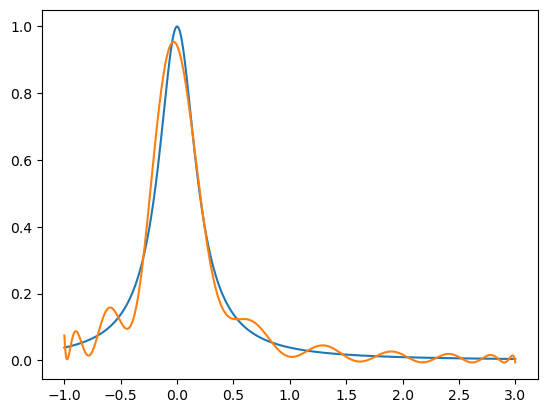

In [63]:
plot_f = lambdify(x, f, modules = ['numpy'])
x_vals = np.linspace(x_0, x_m, 1000)
plot_Q = lambdify(t, Q, modules = ['numpy'])
t_vals = np.linspace(x_0, x_m, 1000)

plt.plot(x_vals, plot_f(x_vals))
plt.plot(t_vals, plot_Q(t_vals))

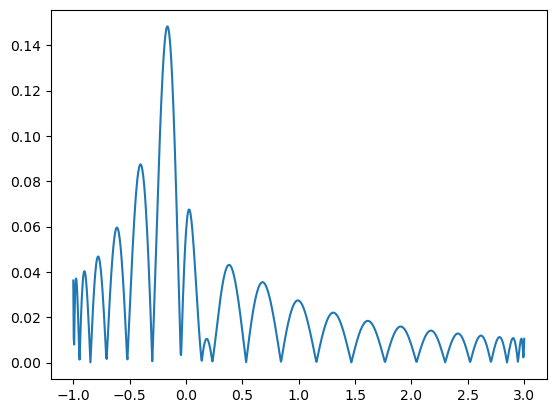

In [64]:
err = lambdify(t, abs(f.subs(x, t) - Q), modules =['numpy'])
plt.plot(t_vals, err(t_vals))